In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Get the Dataset

In [3]:
columns_name = ['user_id','Item_id','rating','timestamp']
df = pd.read_csv('../Datasets/archive/u.data',sep='\t',names=columns_name)

In [4]:
df.head()

,user_id,Item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['user_id'].nunique()

943

In [7]:
df['Item_id'].nunique()

1682

In [8]:
movies_titles = pd.read_csv('../Datasets/archive/movies.csv')


In [9]:
movies_titles.shape

(9125, 3)

In [10]:
movies_titles

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [12]:
movies_titles = movies_titles.iloc[: ,:2]

In [13]:
movies_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [16]:
movies_titles.columns = ['Item_id','title']

In [17]:
movies_titles.head()

,Item_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [19]:
df = pd.merge(df,movies_titles,on="Item_id")

In [28]:
df

,user_id,Item_id,rating,timestamp,title
0,196,242,3,881250949,Farinelli: il castrato (1994)
1,63,242,3,875747190,Farinelli: il castrato (1994)
2,226,242,5,883888671,Farinelli: il castrato (1994)
3,154,242,3,879138235,Farinelli: il castrato (1994)
4,306,242,5,876503793,Farinelli: il castrato (1994)
...,...,...,...,...,...
84201,655,1645,4,892871225,The Devil's Advocate (1997)
84202,916,1682,3,880845755,"Truman Show, The (1998)"
84203,840,1674,4,891211682,Witness (1985)
84204,655,1640,3,888474646,How to Be a Player (1997)


In [21]:
df.tail()

,user_id,Item_id,rating,timestamp,title
84201,655,1645,4,892871225,The Devil's Advocate (1997)
84202,916,1682,3,880845755,"Truman Show, The (1998)"
84203,840,1674,4,891211682,Witness (1985)
84204,655,1640,3,888474646,How to Be a Player (1997)
84205,655,1641,3,887427810,"Full Monty, The (1997)"


## Exploratory Data Analysis

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [30]:
 
df.groupby('title').mean()

,user_id,Item_id,rating,timestamp
title,,,,
'Til There Was You (1997),438.064516,779.0,2.548387,8.839445e+08
1-900 (06) (1994),385.923077,889.0,3.384615,8.874532e+08
101 Dalmatians (1996),473.800000,1367.0,4.200000,8.815961e+08
12 Angry Men (1957),491.476190,1203.0,4.047619,8.859105e+08
187 (One Eight Seven) (1997),620.000000,1609.0,1.666667,8.846611e+08
...,...,...,...,...
"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",426.318182,980.0,3.181818,8.832695e+08
Young Frankenstein (1974),569.812500,1278.0,3.625000,8.830600e+08
Young Guns (1988),454.000000,1378.0,2.200000,8.854126e+08


In [26]:
# so here import is rating which define which movie is blockbuster or flop and rest
df.groupby('title').mean()['rating']

title
'Til There Was You (1997)                                                                        2.548387
1-900 (06) (1994)                                                                                3.384615
101 Dalmatians (1996)                                                                            4.200000
12 Angry Men (1957)                                                                              4.047619
187 (One Eight Seven) (1997)                                                                     1.666667
                                                                                                   ...   
Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)    3.181818
Young Frankenstein (1974)                                                                        3.625000
Young Guns (1988)                                                                                2.200000
Young Guns II (1990)                    

In [32]:
# to make ur data in sort.
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Gandhi (1982)                                                                5.0
Steel (1997)                                                                 5.0
Gattaca (1997)                                                               5.0
Thin Blue Line, The (1988)                                                   5.0
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    5.0
                                                                            ... 
Burnt Offerings (1976)                                                       1.0
Soul Food (1997)                                                             1.0
Godfather, The (1972)                                                        1.0
Bride of Frankenstein, The (Bride of Frankenstein) (1935)                    1.0
My Best Friend's Wedding (1997)                                              1.0
Name: rating, Length: 1337, dtype: float64

In [33]:
df.groupby('title').count() # this will give how many times movie get rating in rating column which directly means how many time movie watch

,user_id,Item_id,rating,timestamp
title,,,,
'Til There Was You (1997),31,31,31,31
1-900 (06) (1994),13,13,13,13
101 Dalmatians (1996),5,5,5,5
12 Angry Men (1957),21,21,21,21
187 (One Eight Seven) (1997),3,3,3,3
...,...,...,...,...
"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",22,22,22,22
Young Frankenstein (1974),16,16,16,16
Young Guns (1988),5,5,5,5


In [36]:
# Most watched or rated movies
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Usual Suspects, The (1995)                              583
Kid in King Arthur's Court, A (1995)                    509
City Hall (1996)                                        508
Mighty Morphin Power Rangers: The Movie (1995)          507
Perez Family, The (1995)                                485
                                                       ... 
Contact (1997)                                            1
When the Cat's Away (Chacun cherche son chat) (1996)      1
Conan the Barbarian (1982)                                1
Hype! (1996)                                              1
Mad City (1997)                                           1
Name: rating, Length: 1337, dtype: int64

In [37]:
# making new dataframe
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [38]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.548387
1-900 (06) (1994),3.384615
101 Dalmatians (1996),4.200000
12 Angry Men (1957),4.047619
187 (One Eight Seven) (1997),1.666667


In [42]:
#now include num ber of ratings
ratings['Number of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [50]:
ratings

,rating,Number of ratings
title,,
'Til There Was You (1997),2.548387,31
1-900 (06) (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (One Eight Seven) (1997),1.666667,3
...,...,...
"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",3.181818,22
Young Frankenstein (1974),3.625000,16
Young Guns (1988),2.200000,5


In [53]:
ratings.sort_values(by='rating',ascending=False)

,rating,Number of ratings
title,,
Gandhi (1982),5.0,3
Gattaca (1997),5.0,1
Steel (1997),5.0,1
"Thin Blue Line, The (1988)",5.0,3
"Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)",5.0,1
...,...,...
Star Trek V: The Final Frontier (1989),1.0,1
"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",1.0,1
"Bride of Frankenstein, The (Bride of Frankenstein) (1935)",1.0,1


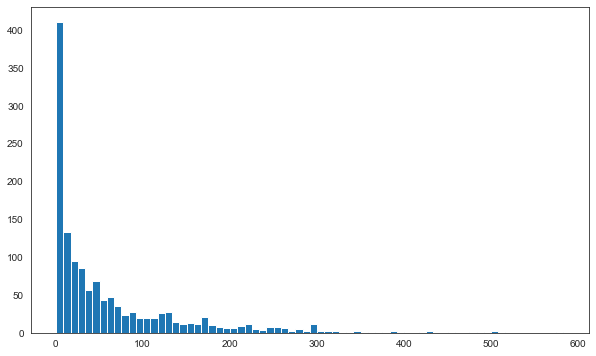

In [55]:
plt.figure(figsize=(10,6))
plt.hist(ratings['Number of ratings'],bins=70)
plt.show()

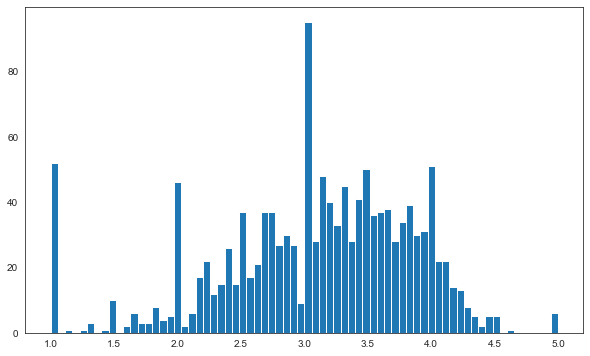

In [56]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)
plt.show()

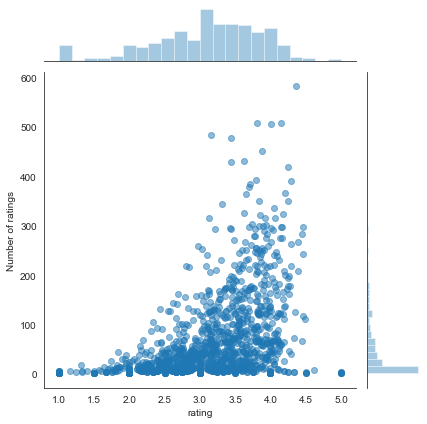

In [58]:
sns.jointplot(x='rating',y='Number of ratings' ,data= ratings, alpha=0.5)
plt.show()

## Creating Movie Recommendation

In [59]:
df.head()

,user_id,Item_id,rating,timestamp,title
0,196,242,3,881250949,Farinelli: il castrato (1994)
1,63,242,3,875747190,Farinelli: il castrato (1994)
2,226,242,5,883888671,Farinelli: il castrato (1994)
3,154,242,3,879138235,Farinelli: il castrato (1994)
4,306,242,5,876503793,Farinelli: il castrato (1994)


In [60]:
moviematrix = df.pivot_table(index="user_id",columns="title",values="rating")

In [62]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",...,"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)",Wonderland (1997),"World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Year of the Horse (1997),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
ratings.sort_values("Number of ratings",ascending=False).head()

,rating,Number of ratings
title,,
"Usual Suspects, The (1995)",4.358491,583
"Kid in King Arthur's Court, A (1995)",3.803536,509
City Hall (1996),4.155512,508
Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
"Perez Family, The (1995)",3.156701,485


In [76]:
usualSuspect_user_ratings=moviematrix['Usual Suspects, The (1995)']

In [77]:
usualSuspect_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Usual Suspects, The (1995), dtype: float64

In [80]:
# correlation of 'usualsuspect' movie with others movies
similar_to_usualSuspect=moviematrix.corrwith(usualSuspect_user_ratings)

In [81]:
similar_to_usualSuspect

title
'Til There Was You (1997)                                                                       -0.069030
1-900 (06) (1994)                                                                               -0.179605
101 Dalmatians (1996)                                                                                 NaN
12 Angry Men (1957)                                                                              0.219846
187 (One Eight Seven) (1997)                                                                     0.500000
                                                                                                   ...   
Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)    0.194145
Young Frankenstein (1974)                                                                        0.177537
Young Guns (1988)                                                                                0.866025
Young Guns II (1990)                    

In [84]:
# change into data frame
corr_usualSuspect = pd.DataFrame(similar_to_usualSuspect,columns=['Correlation'])

In [85]:
corr_usualSuspect.head()

,Correlation
title,
'Til There Was You (1997),-0.069030
1-900 (06) (1994),-0.179605
101 Dalmatians (1996),NaN
12 Angry Men (1957),0.219846
187 (One Eight Seven) (1997),0.500000


In [87]:
# remove NaN from data frame   # why give inplace = True which permentaly remove NaN 
corr_usualSuspect.dropna(inplace = True)

In [88]:
corr_usualSuspect

,Correlation
title,
'Til There Was You (1997),-0.069030
1-900 (06) (1994),-0.179605
12 Angry Men (1957),0.219846
187 (One Eight Seven) (1997),0.500000
2 Days in the Valley (1996),0.101015
...,...
"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",0.194145
Young Frankenstein (1974),0.177537
Young Guns (1988),0.866025


In [91]:
corr_usualSuspect.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Usual Suspects, The (1995)",1.0
I Shot Andy Warhol (1996),1.0
Sophie's Choice (1982),1.0
Grease (1978),1.0
Forbidden Planet (1956),1.0
Evita (1996),1.0
Shall We Dance? (Shall We Dansu?) (1996),1.0
Star Trek: First Contact (1996),1.0
"Seventh Seal, The (Sjunde inseglet, Det) (1957)",1.0


In [94]:
ratings

,rating,Number of ratings
title,,
'Til There Was You (1997),2.548387,31
1-900 (06) (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (One Eight Seven) (1997),1.666667,3
...,...,...
"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",3.181818,22
Young Frankenstein (1974),3.625000,16
Young Guns (1988),2.200000,5


In [96]:
corr_usualSuspect=corr_usualSuspect.join(ratings['Number of ratings'])

In [97]:
corr_usualSuspect.head()

,Correlation,Number of ratings
title,,
'Til There Was You (1997),-0.069030,31
1-900 (06) (1994),-0.179605,13
12 Angry Men (1957),0.219846,21
187 (One Eight Seven) (1997),0.500000,3
2 Days in the Valley (1996),0.101015,10


In [109]:
corr_usualSuspect[corr_usualSuspect['Number of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,Number of ratings
title,,
"Usual Suspects, The (1995)",1.000000,583
Johnny Mnemonic (1995),0.747981,367
Mighty Morphin Power Rangers: The Movie (1995),0.672556,507
Jury Duty (1995),0.536117,420
Immortal Beloved (1994),0.377433,130
...,...,...
Tom & Viv (1994),-0.127167,113
Stargate (1994),-0.130466,112
National Lampoon's Senior Trip (1995),-0.148507,128


## Predict Function

In [106]:
def predict_movies(movie_name):
    movie_user_ratings = moviematrix[movie_name]
    similar_to_movie = moviematrix.corrwith(movie_user_ratings)   # correlation with other movies
    
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])   # new data frame with correlation
    corr_movie.dropna(inplace = True)                                    # remove NaN from datframe
    
    corr_movie = corr_movie.join(ratings['Number of ratings'])      
    Prediction = corr_movie[corr_movie['Number of ratings']>100].sort_values('Correlation',ascending=False)   # THRESHOLD OF 100 NUMBER OF RATINGS IS APPLIED
    
    return Prediction

In [107]:
predictions = predict_movies("Jury Duty (1995)") 

In [108]:
predictions.head()

,Correlation,Number of ratings
title,,
Jury Duty (1995),1.000000,420
Johnny Mnemonic (1995),0.538659,367
"Usual Suspects, The (1995)",0.536117,583
Under Siege 2: Dark Territory (1995),0.506807,350
Nico Icon (1995),0.490823,151
